In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  

In [2]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [4]:
data.dropna(inplace=True)
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


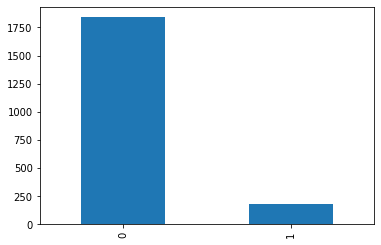

In [5]:
# counting the values of bad column
data['bad'].value_counts().plot.bar()

In [6]:
# creating dummy columns for categorical variables
dms = pd.get_dummies(data[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [7]:
# dropping the categoricals and adding the dummies
X_ = data.drop(['bad', 'reason', 'job'],axis=1)
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [8]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
y = data["bad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1816, 16), (1816,), (202, 16), (202,))

In [9]:
X_train.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_ProfEx,job_Sales,job_Self
202,11900,89595.0,107895.0,9.0,0.0,0.0,250.47,0.0,24.0,30.305,0,1,0,0,0,0
367,8800,78953.0,93018.0,7.0,0.0,0.0,110.72,0.0,22.0,28.289,1,1,0,0,0,0
1545,26200,149599.0,181869.0,1.0,0.0,0.0,204.03,0.0,35.0,39.801,1,0,0,0,0,0
2197,20400,29985.0,54038.0,15.0,0.0,0.0,177.59,1.0,20.0,35.554,1,0,0,1,0,0
1696,25400,149364.0,210724.0,10.0,0.0,0.0,266.51,1.0,34.0,41.618,0,0,0,0,0,0


In [10]:
# stats models logistic regression with all variables
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.257608
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1816
Model:                          Logit   Df Residuals:                     1800
Method:                           MLE   Df Model:                           15
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.1359
Time:                        11:57:59   Log-Likelihood:                -467.82
converged:                       True   LL-Null:                       -541.41
Covariance Type:            nonrobust   LLR p-value:                 8.723e-24
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.78e-05   1.07e-05     -1.664      0.096   -3.88e-05    3.17e-06
mortdue         1.015e-06   4.88e-06      0.208      0.835   -8.56e-06    1.06e-05
value          -1.901e-06   4.07e-06     -0.467      0.641   -9.89e-06    6.09e-06
yoj               -0.0364      0.014     -2.673      0.008      -0.063      -0.010
derog              0.5516      0.128      4.294      0.000       0.300       0.803
delinq             0.7548      0.094      8.063      0.000       0.571       0.938
clage             -0.0085      0.001     -6.103      0.000      -0.011      -0.006
ninq               0.0309      0.049      0.627      0.531      -0.066       0.128
clno              -0.0402      0.011     -3.543      0.000      -0.062      -0.018
debtinc            0.0196      0.007      2.703      0.007       0.005       0.034
reason_DebtCon    -0.4788      0.184     -2.596      0.009      -0.840      -0.117
job_Mgr           -0.1503      0.268     -0.560      0.575      -0.676       0.376
job_Office        -0.7316      0.290     -2.521      0.012      -1.300      -0.163
job_ProfEx        -0.2778      0.254     -1.092      0.275      -0.777       0.221
job_Sales          0.8605      0.600      1.434      0.152      -0.315       2.036
job_Self           0.9308      0.523      1.780      0.075      -0.094       1.955
==================================================================================
"""

In [11]:
# dropping columns whose p value is greater than 0.05
X_train = X_train.drop(['loan','mortdue','value','ninq','job_Mgr','job_ProfEx','job_Sales','job_Self'], axis = 1)
X_test = X_test.drop(['loan','mortdue','value','ninq','job_Mgr','job_ProfEx','job_Sales','job_Self'], axis = 1)

In [12]:
# stats models logistic regression with useful columns
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261120
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1816
Model:                          Logit   Df Residuals:                     1808
Method:                           MLE   Df Model:                            7
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.1242
Time:                        11:57:59   Log-Likelihood:                -474.19
converged:                       True   LL-Null:                       -541.41
Covariance Type:            nonrobust   LLR p-value:                 7.443e-26
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
yoj               -0.0443      0.013     -3.310      0.001      -0.071      -0.018
derog              0.6127      0.125      4.906      0.000       0.368       0.858
delinq             0.7689      0.093      8.250      0.000       0.586       0.952
clage             -0.0090      0.001     -6.846      0.000      -0.012      -0.006
clno              -0.0457      0.010     -4.358      0.000      -0.066      -0.025
debtinc            0.0153      0.006      2.431      0.015       0.003       0.028
reason_DebtCon    -0.5508      0.172     -3.195      0.001      -0.889      -0.213
job_Office        -0.7241      0.275     -2.633      0.008      -1.263      -0.185
==================================================================================
"""

In [13]:
# sklearn logistic regression
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = loj_model.predict(X_test)
print(classification_report(y_test, y_pred))
# our model predict 1s very well but for 0s we cannot say the same

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [15]:
loj_model.intercept_, loj_model.coef_

(array([-4.05124172]),
 array([[-0.02095715,  0.61839047,  0.74547265, -0.00512663, -0.02979422,
          0.0855189 , -0.05651833, -0.59401139]]))

In [20]:
# confusion matrix and accuracy for training set
y_pred_train = loj_model.predict(X_train)
confusion_mat = confusion_matrix(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Counfusion matrix: \n",confusion_mat)
print("Accuracy: ",accuracy)
# model's accuracy for training set looks good

Counfusion matrix: 
 [[1649    7]
 [ 127   33]]
Accuracy:  0.9262114537444934


In [22]:
# confusion matrix and accuracy for test set
y_pred = loj_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Counfusion matrix: \n",confusion_mat)
print("Accuracy: ",accuracy)
# model's accuracy for test set looks good and nearly equal to training accuracy

Counfusion matrix: 
 [[183   1]
 [ 16   2]]
Accuracy:  0.9158415841584159


In [17]:
print(classification_report(y_test, y_pred))
# precision for 0s is good but for 1s model is weak to predict 1s

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [18]:
# cross validation accuracy
cross_val_score(loj_model, X_test, y_test, cv=10).mean()
# cv accuracy score is very close to training accuracy

0.9108771929824563

fpr:  [0.         0.         0.         0.00054348 0.00054348 0.00108696
 0.00108696 0.00163043 0.00163043 0.00217391]
tpr:  [0.         0.00561798 0.11797753 0.11797753 0.12359551 0.12359551
 0.1741573  0.1741573  0.17977528 0.17977528]
thresholds:  [1.99971996 0.99971996 0.75736046 0.74593779 0.74128176 0.73555029
 0.59313763 0.58331415 0.58177938 0.57306961]


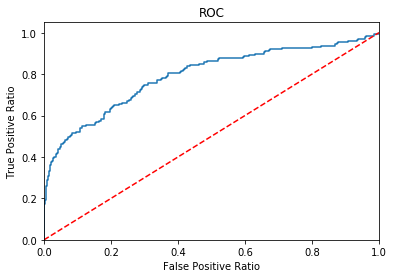

In [19]:
# dropping columns whose p value is greater than 0.05
X = X.drop(['loan','mortdue','value','ninq','job_Mgr','job_ProfEx','job_Sales','job_Self'], axis = 1)

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC')
plt.show()